# EDA - Non-Alcohol Fatty Liver Disease

## A. Introduction

Data set nafld1 contains the data from a population study of non-alcoholic fatty liver disease (NAFLD). 

**Numerical Features:**

- id (subject identifier)
- age (age at entry to the study)
- weight (weight in kg)
- height (height in cm)
- bmi (body mass index)
- case.id (the id of the NAFLD case to whom this subject is matched)
- futime (time to death or last follow-up)

**Categorical Features:**
- male (0: female, 1: male)

**Target Variable:**
- status (0: alive at last follow-up, 1: dead)

## B. Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Desktop/archive/nafld1.csv")

## C. Quick Data Exploration

In [3]:
df.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [4]:
df.tail()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
17544,11130,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,1099,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,1522,17564,59,0,57.3,NaN,NaN,16164.0,5081,0
17547,5764,17565,61,0,NaN,NaN,NaN,17276.0,3627,1
17548,6658,17566,69,1,94.1,180.0,29.204650,2017.0,2744,0


The dataset has 17548 data rows. There are mostly numerical attributes and two categorical attributes (male and status).

The last attribute status indicates whether the patient is alive (0) or not (1). This attribute would be a primary candidate for an attribute to learn to predict from the values of the other attributes.

In [5]:
df.shape

(17549, 10)

Dataset consists of 17549 observations (rows) and 10 features (columns).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


Data has only float and integer values. It looks like that the attribute male has already been converted to a numerical attribute.

In [7]:
df.isna().sum()

Unnamed: 0       0
id               0
age              0
male             0
weight        4786
height        3168
bmi           4961
case.id         31
futime           0
status           0
dtype: int64

- Attribute weight has 4786 missing values.
- Attribute height has 3168 missing values.
- Attribute bmi has 4961 missing values.

In [8]:
df.isnull().sum() / len(df) * 100

Unnamed: 0     0.000000
id             0.000000
age            0.000000
male           0.000000
weight        27.272209
height        18.052311
bmi           28.269417
case.id        0.176648
futime         0.000000
status         0.000000
dtype: float64

With 18.05% height has no more than 25% missing values. Weight (27.27%) and BMI (28.27%) have a little more than 25% missing values,

In [9]:
df[df.duplicated()]

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status


In [10]:
# Get column names
column_names = df.columns
print(column_names)

Index(['Unnamed: 0', 'id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')


In [11]:
# Also check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

Unnamed: 0 is unique: True
id is unique: True
age is unique: False
male is unique: False
weight is unique: False
height is unique: False
bmi is unique: False
case.id is unique: False
futime is unique: False
status is unique: False


Attribute unnamed and id are unique. The other attributes are not unique. Therefore, those objects contain duplicates.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17549.0,8780.106046,5070.539328,1.000000,4389.000000,8778.000000,13171.000000,17566.000000
id,17549.0,8784.215967,5070.970712,1.000000,4393.000000,8786.000000,13175.000000,17566.000000
age,17549.0,52.659639,14.722515,18.000000,42.000000,53.000000,63.000000,98.000000
male,17549.0,0.467320,0.498945,0.000000,0.000000,0.000000,1.000000,1.000000
weight,12763.0,86.353350,22.239458,33.400000,70.000000,83.900000,99.200000,181.700000
height,14381.0,169.434949,10.141421,123.000000,162.000000,169.000000,177.000000,215.000000
bmi,12588.0,30.073865,7.085435,9.207332,25.136434,28.875884,33.710372,84.395725
case.id,17518.0,8840.924478,5051.334075,3.000000,4598.000000,8781.000000,13249.000000,17563.000000
futime,17549.0,2410.600547,1573.017638,7.000000,1132.000000,2148.000000,3353.000000,7268.000000
status,17549.0,0.077725,0.267746,0.000000,0.000000,0.000000,0.000000,1.000000


- Mean of weight, height, bmi, and futime are greater than median. Therefore, distribution is positively skewed.
- Note that male is a categorical attribute despite having numerical values.

## D. Univariate Analysis

### 1. Target Variable (if categorical)

In [13]:
df.status.unique()

array([0, 1])

The target variable status is discrete and it is a classification problem.

In [14]:
 # As it is a categorical variable, we will look at its frequency table, percentage distribution and bar plot.
df.status.value_counts()

0    16185
1     1364
Name: status, dtype: int64

- 16185 patients alive
- 1364 patients not alive

In [15]:
# Normalize can be set to True to print proportions instead of number 
df.status.value_counts(normalize=True)

0    0.922275
1    0.077725
Name: status, dtype: float64

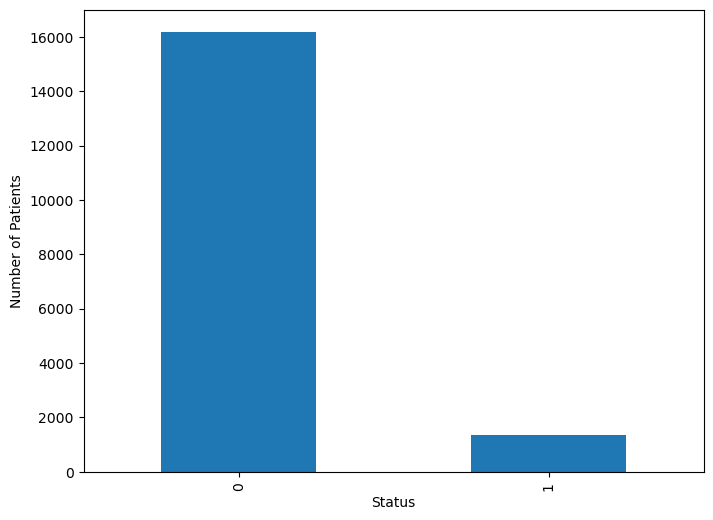

In [16]:
plt.figure(figsize=(8,6))
df.status.value_counts().plot(kind='bar')
plt.ylabel('Number of Patients')
plt.xlabel('Status')
plt.show()

The distribution is imbalanced. There are more patients that are alive than not alive.

### 2. Independent Variables

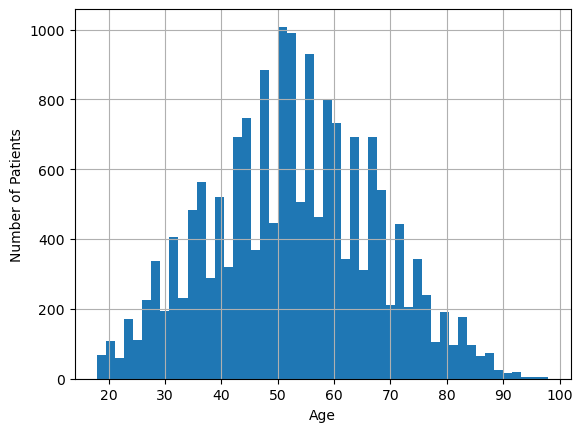

In [17]:
df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

- The highest number of patients falls within the 40 to 70 years bin. 
- The age ranges under 20 to almost 100.

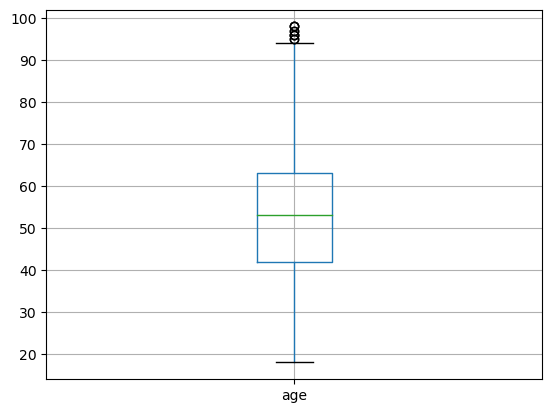

In [18]:
df.boxplot(column='age')
plt.show()

- 25 % of the patients are below 42 years old and 75 % are above 42 years old (25 % percentile).
- 50 % of the patients are below 54 years old and 50 % are above 54 years old (median).
- 75 % of the patients are below 63 years old and 25 % are above 63 years old (75 % percentile).

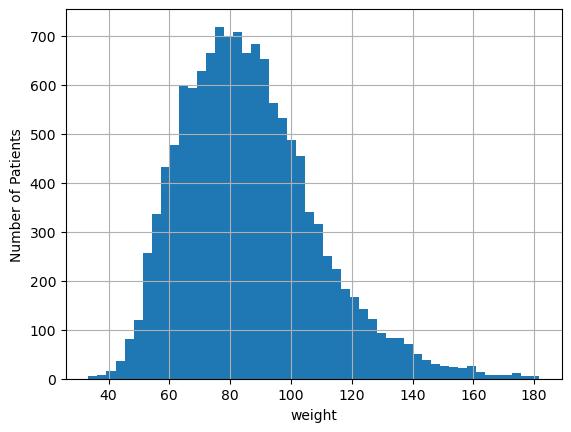

In [19]:
df['weight'].hist(bins=50)
plt.xlabel('weight')
plt.ylabel('Number of Patients')
plt.show()

- The highest number of patients falls within the 60 to 100 kg bin. 
- The weight ranges from under 40 to 180.

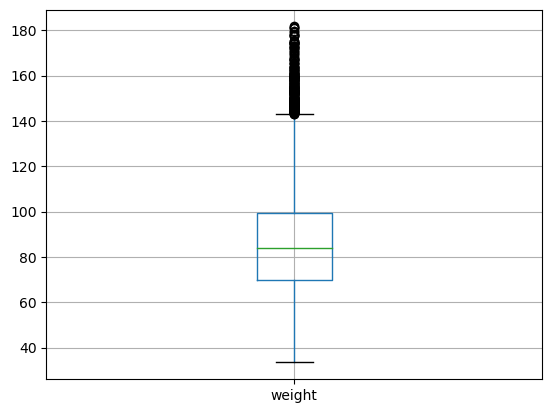

In [20]:
df.boxplot(column='weight')
plt.show()

- 25 % of the patients are below 70 kg and 75 % are above 70 kg (25 % percentile).
- 50 % of the patients are below 85 kg and 50 % are above 85 kg (median).
- 75 % of the patients are below 100 kg and 25 % are above 100 kg (75 % percentile).

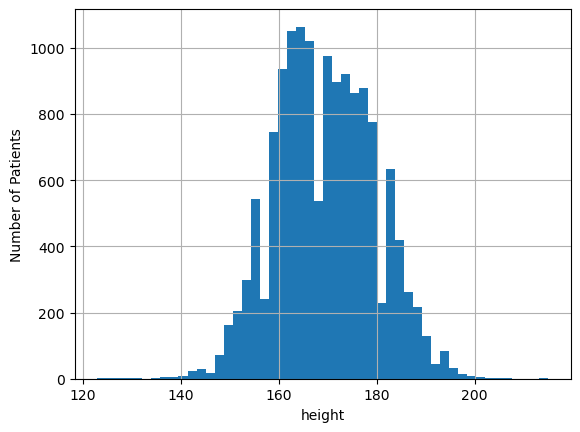

In [21]:
df['height'].hist(bins=50)
plt.xlabel('height')
plt.ylabel('Number of Patients')
plt.show()

- The highest number of patients falls within the 160 to 180 cm bin. 
- The weight ranges from under 140 to 200.

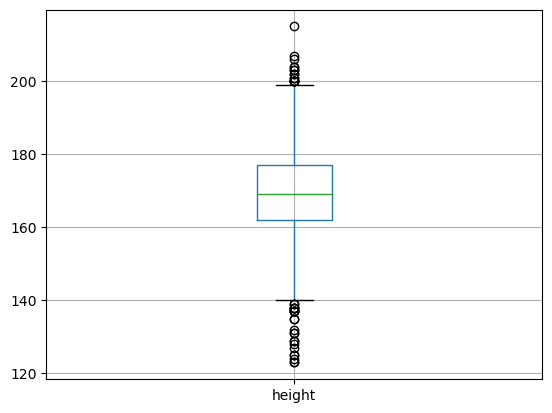

In [22]:
df.boxplot(column='height')
plt.show()

- 25 % of the patients are below 162 cm and 75 % are above 162 cm (25 % percentile).
- 50 % of the patients are below 170 cm and 50 % are above 170 cm (median).
- 75 % of the patients are below 178 cm and 25 % are above 178 cm (75 % percentile).

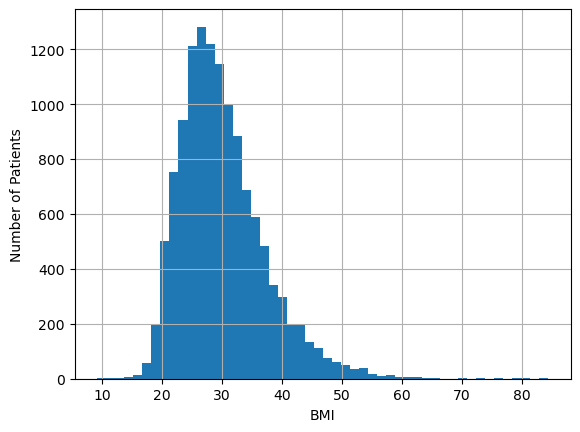

In [23]:
df['bmi'].hist(bins=50)
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.show()

- The highest number of patients falls within the 20 to 40 bin. 
- The bmi ranges from under 20 to 60.

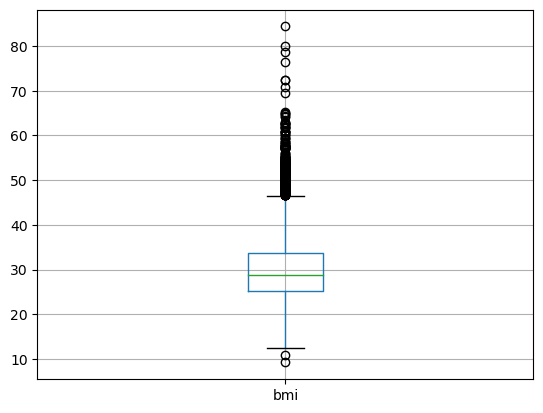

In [24]:
df.boxplot(column='bmi')
plt.show()

- 25 % of the patients are below 25 and 75 % are above 25 (25 % percentile).
- 50 % of the patients are below 28 and 50 % are above 28 (median).
- 75 % of the patients are below 34 and 25 % are above 34 (75 % percentile).

In [25]:
df.loc[df['bmi'].between(0, 18.4, 'both'), 'bmi_category'] = 'underweight'
df.loc[df['bmi'].between(18.5, 25, 'both'), 'bmi_category'] = 'healthy'
df.loc[df['bmi'].between(25.1, 100, 'both'), 'bmi_category'] = 'obese'

In [26]:
df.bmi_category.value_counts()

obese          9468
healthy        2941
underweight      91
Name: bmi_category, dtype: int64

Most of the patients fall into the obese category. 

In [27]:
df.male.value_counts()

0    9348
1    8201
Name: male, dtype: int64

The number of males (8201) and females (9348) are almost balanced in the dataset.

In [28]:
df.male.count()

17549

## E. Bivariate Analysis

### Status vs. Age

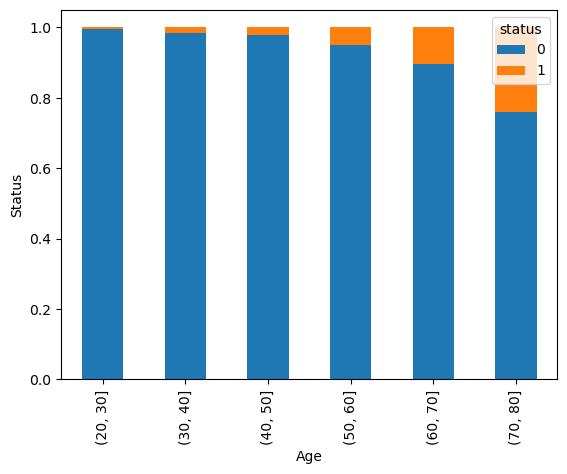

In [29]:
bins=[20,30,40,50,60,70,80] # bin range

df['extra_col']=pd.cut(df['age'],bins)
age=pd.crosstab(df['extra_col'],df['status']) 
age.div(age.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('Age') 
P = plt.ylabel('Status')

- More older patients are not alive than younger patients.

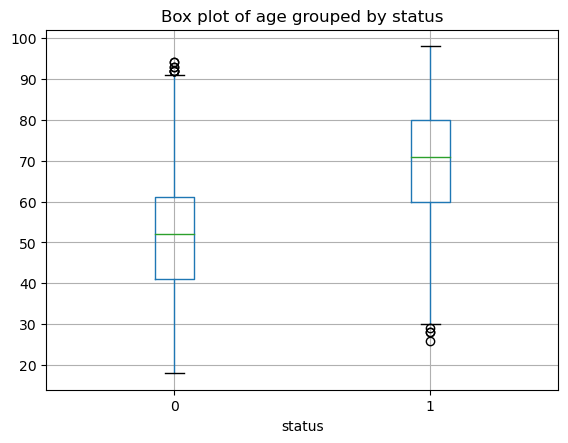

In [30]:
# Boxp lots of age grouped by the categorical attribute status
df.boxplot(column='age', by='status')
plt.title('Box plot of age grouped by status')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

- Patients that are alive between 40 and 60, while patients that are not alive are between 60 and 80. 
- The median age of the patients that are not alive is higher than the median age of the patients that are alive. Therefore, in average the not alive patients are older than the alive patients.
- There are some outliers under 30 years that are not alive. There are some outliers over 90 years that are alive.

We can add male to the plot above as follows.

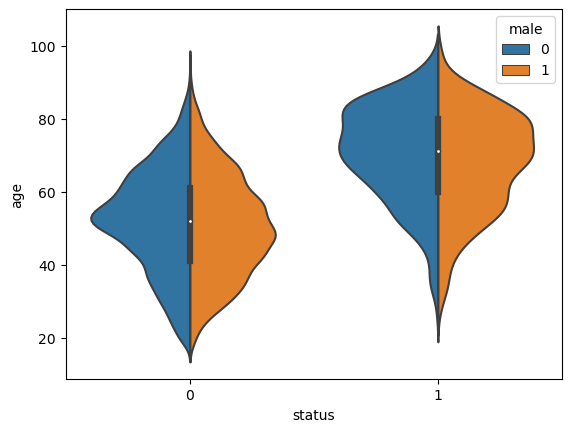

In [31]:
sns.violinplot(data=df, x='status', y='age', hue='male', split=True)
plt.show()

### Status vs. Weight

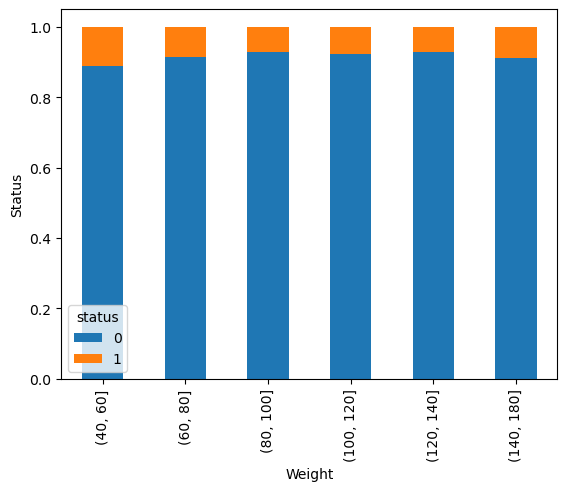

In [32]:
bins=[40,60,80,100,120,140,180] # bin range

df['extra_col']=pd.cut(df['weight'],bins)
age=pd.crosstab(df['extra_col'],df['status']) 
age.div(age.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('Weight') 
P = plt.ylabel('Status')

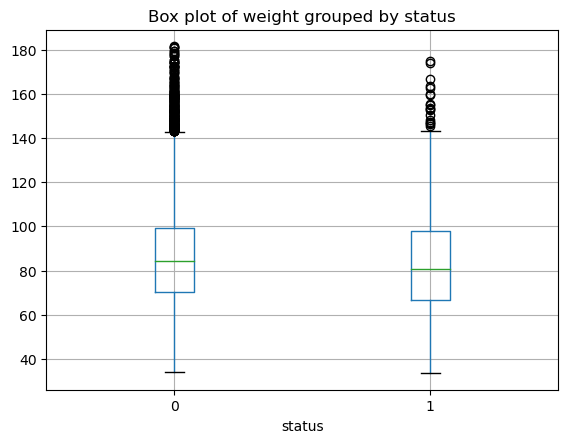

In [33]:
# Boxp lots of weight grouped by the categorical attribute status
df.boxplot(column='weight', by='status')
plt.title('Box plot of weight grouped by status')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

- The median age of the patients that are not alive is almost the same than the median age of the patients that are alive.

We can add male to the plot above as follows.

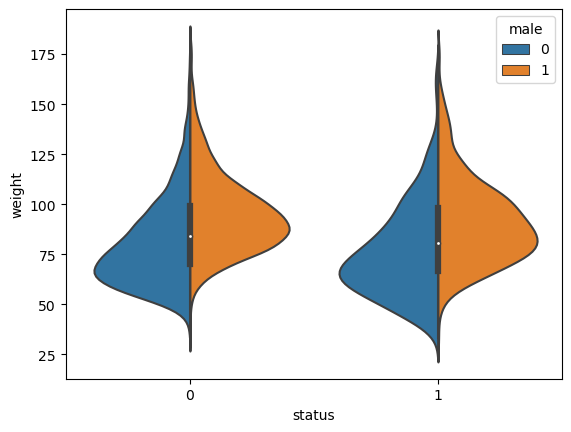

In [34]:
sns.violinplot(data=df, x='status', y='weight', hue='male', split=True)
plt.show()

### Status vs. BMI Category

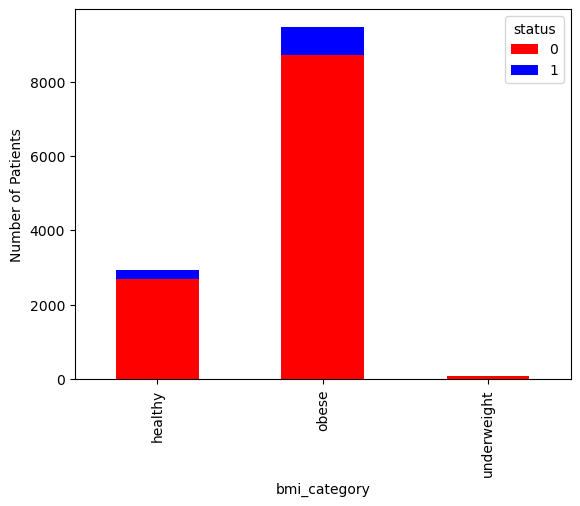

In [35]:
crosstab_bc_by_status = pd.crosstab(df['bmi_category'], df['status'])
crosstab_bc_by_status.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Patients')
plt.show()

## E. Splitting Dataset into Subsets

The objective of this study is the influence of the variables on the target variable (if the patient is alive or not). 

We will split the data into two subsets:
- df1 Subset : All samples with value 1 of status
- df0 Subset: All samples with value 0 of status

In [36]:
df1 = df[df.status==1]
df0 = df[df.status==0]

In [37]:
df1

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status,bmi_category,extra_col
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1,NaN,NaN
9,688,10,79,0,56.6,155.0,23.718527,13518.0,2239,1,healthy,"(40.0, 60.0]"
39,1196,40,61,0,NaN,159.0,NaN,4216.0,1705,1,NaN,NaN
44,4536,45,63,0,104.5,161.0,40.189181,17180.0,4931,1,obese,"(100.0, 120.0]"
47,7598,48,71,0,90.9,164.0,33.874139,48.0,6368,1,obese,"(80.0, 100.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
17504,14242,17522,55,1,103.6,193.0,27.697898,17522.0,342,1,obese,"(100.0, 120.0]"
17509,6530,17527,66,1,89.3,183.0,26.690345,3489.0,5442,1,obese,"(80.0, 100.0]"
17518,711,17536,80,1,102.6,166.0,37.153783,176.0,618,1,obese,"(100.0, 120.0]"
17540,7704,17558,72,0,106.8,168.0,38.035584,784.0,3991,1,obese,"(100.0, 120.0]"


In [38]:
df0

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status,bmi_category,extra_col
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,healthy,"(40.0, 60.0]"
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0,healthy,"(60.0, 80.0]"
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0,obese,"(100.0, 120.0]"
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0,obese,"(100.0, 120.0]"
5,14423,6,39,0,63.9,155.0,26.615590,7144.0,1581,0,obese,"(60.0, 80.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
17543,10379,17561,56,0,NaN,NaN,NaN,3994.0,3141,0,NaN,NaN
17544,11130,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0,healthy,"(40.0, 60.0]"
17545,1099,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0,obese,"(100.0, 120.0]"
17546,1522,17564,59,0,57.3,NaN,NaN,16164.0,5081,0,NaN,"(40.0, 60.0]"


Text(0.5, 1.0, 'Boxplot for Age by Status')

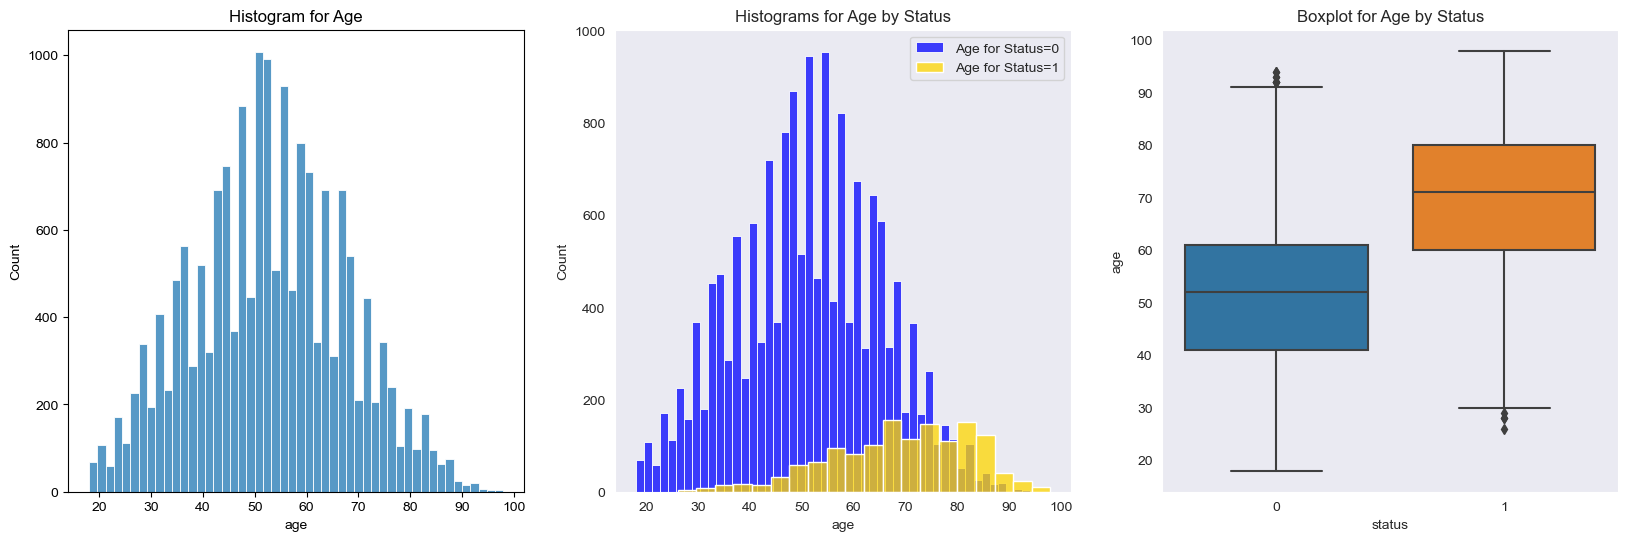

In [39]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Age")
sns.histplot(df.age,kde=False)
plt.subplot(1,3,2)
sns.histplot(df0.age,kde=False,color="Blue", label="Age for Status=0")
sns.histplot(df1.age,kde=False,color = "Gold", label = "Age for Status=1")
plt.title("Histograms for Age by Status")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.status,y=df.age)
plt.title("Boxplot for Age by Status")

- According to the Histogram Age by Status, more older people are not alive.
- According to the Boxplot Age by Status, not alive patients were older in average than alive patients. 
- There is one outlier in the alive subset of the data set.

Text(0.5, 1.0, 'Boxplot for Weight by Status')

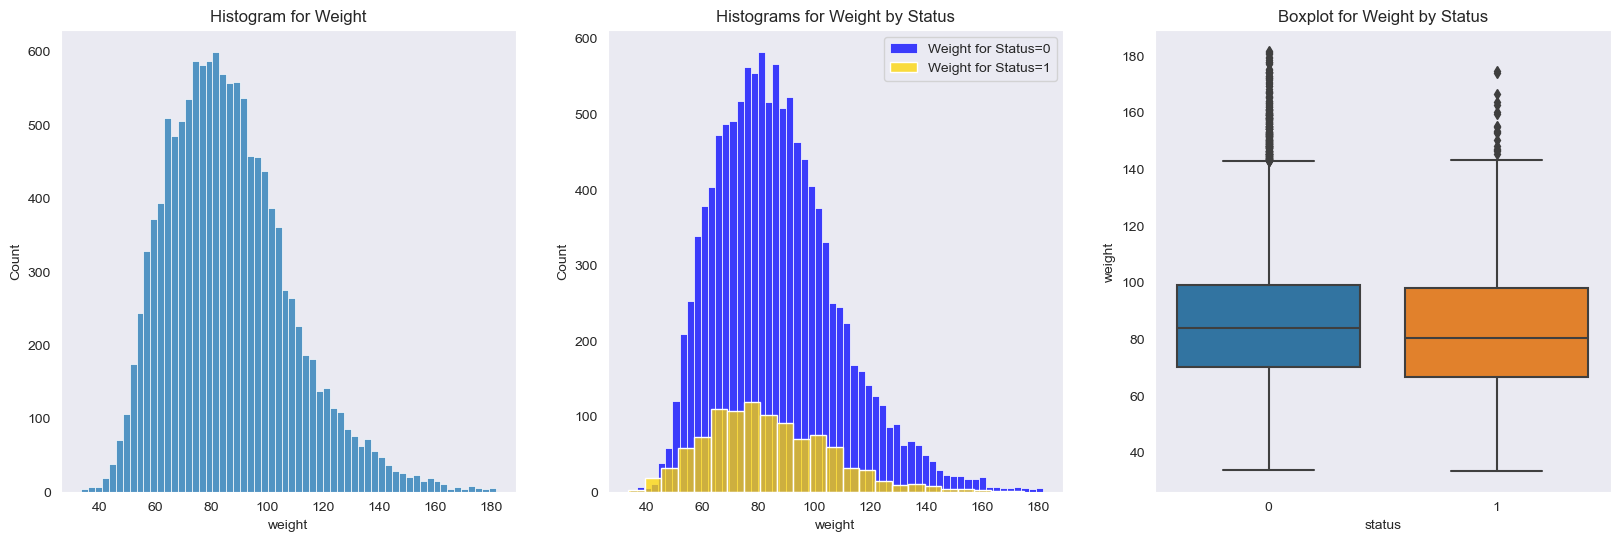

In [40]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Weight")
sns.histplot(df.weight,kde=False)
plt.subplot(1,3,2)
sns.histplot(df0.weight,kde=False,color="Blue", label="Weight for Status=0")
sns.histplot(df1.weight,kde=False,color = "Gold", label = "Weight for Status=1")
plt.title("Histograms for Weight by Status")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.status,y=df.weight)
plt.title("Boxplot for Weight by Status")

- According to the Boxplot for Weight by Status, the median weight is almost the same for both groups.

Text(0.5, 1.0, 'Boxplot for BMI by Status')

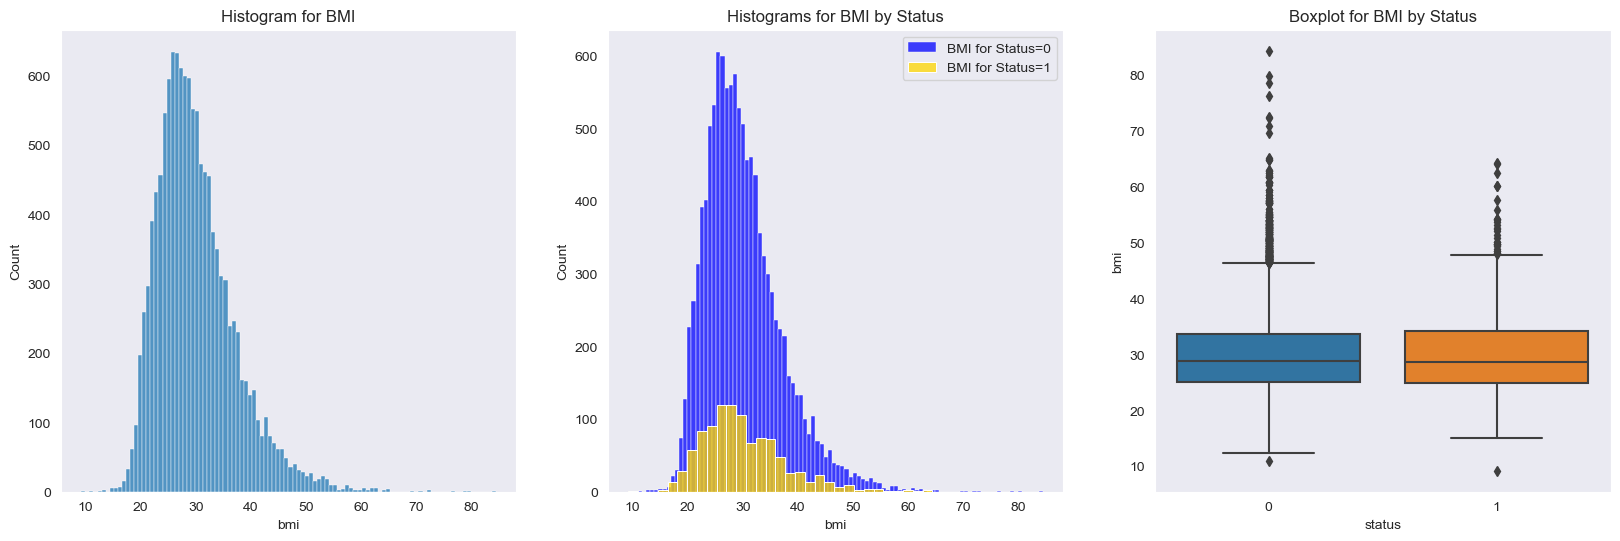

In [41]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for BMI")
sns.histplot(df.bmi,kde=False)
plt.subplot(1,3,2)
sns.histplot(df0.bmi,kde=False,color="Blue", label="BMI for Status=0")
sns.histplot(df1.bmi,kde=False,color = "Gold", label = "BMI for Status=1")
plt.title("Histograms for BMI by Status")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.status,y=df.bmi)
plt.title("Boxplot for BMI by Status")

- According to the Boxplot for BMI by Status, the median BMI is the same for both groups.

We will split the data into two subsets:
- males Subset : All samples with value 1 of male
- females Subset: All samples with value 0 of male

In [42]:
males = df[df.male == 1 ]
females = df[df.male == 0 ]

In [43]:
males.describe()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
count,8201.000000,8201.000000,8201.000000,8201.0,5695.000000,6535.000000,5582.000000,8183.000000,8201.000000,8201.000000
mean,8859.558834,8783.308621,51.854286,1.0,94.869166,177.118898,30.263396,8904.723940,2376.485185,0.084136
std,5240.327463,5053.882425,14.692187,0.0,20.121153,7.682188,6.052759,4993.964368,1590.142627,0.277609
min,1.000000,3.000000,18.000000,1.0,33.400000,123.000000,9.207332,3.000000,7.000000,0.000000
25%,4299.000000,4399.000000,41.000000,1.0,80.800000,172.000000,26.135696,4715.000000,1073.000000,0.000000
50%,8756.000000,8742.000000,51.000000,1.0,92.100000,177.000000,29.331185,8914.000000,2063.000000,0.000000
75%,13419.000000,13160.000000,62.000000,1.0,105.200000,182.000000,33.256471,13224.000000,3369.000000,0.000000
max,17566.000000,17566.000000,98.000000,1.0,181.100000,215.000000,84.395725,17563.000000,7128.000000,1.000000


- The mean weight is 94.87 kg. 
- The mean height is 177.12 cm. 
- The mean BMI is 30.26.

In [44]:
females.describe()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
count,9348.000000,9348.000000,9348.000000,9348.0,7068.00000,7846.000000,7006.000000,9335.000000,9348.000000,9348.000000
mean,8710.402118,8785.011981,53.366175,0.0,79.49178,163.034922,29.922856,8784.998286,2440.529953,0.072101
std,4915.982949,5086.185087,14.713598,0.0,21.48103,7.015674,7.808238,5100.704130,1557.308692,0.258669
min,3.000000,1.000000,18.000000,0.0,35.10000,123.000000,13.040536,13.000000,7.000000,0.000000
25%,4469.750000,4392.250000,44.000000,0.0,63.80000,158.000000,24.135251,4573.000000,1176.000000,0.000000
50%,8796.500000,8818.500000,54.000000,0.0,75.10000,163.000000,28.399992,8697.000000,2199.000000,0.000000
75%,12994.250000,13200.250000,63.000000,0.0,91.20000,168.000000,34.247935,13269.000000,3332.000000,0.000000
max,17563.000000,17565.000000,96.000000,0.0,181.70000,197.000000,78.582172,17560.000000,7268.000000,1.000000


- The mean weight is 79.49 kg.
- The mean height is 163.03 cm.
- The mean BMI is 29.92. 

In [45]:
round(males.status.value_counts() / len(males) * 100,2)

0    91.59
1     8.41
Name: status, dtype: float64

91.59 % of male patients are alive. 

In [46]:
round(females.status.value_counts() / len(females) * 100,2)

0    92.79
1     7.21
Name: status, dtype: float64

92.79 % of female patients are alive.

## F. Multivariate Analysis

We can also examine the correlation matrix of all numerical attributes in the form of a heat map.

<AxesSubplot:>

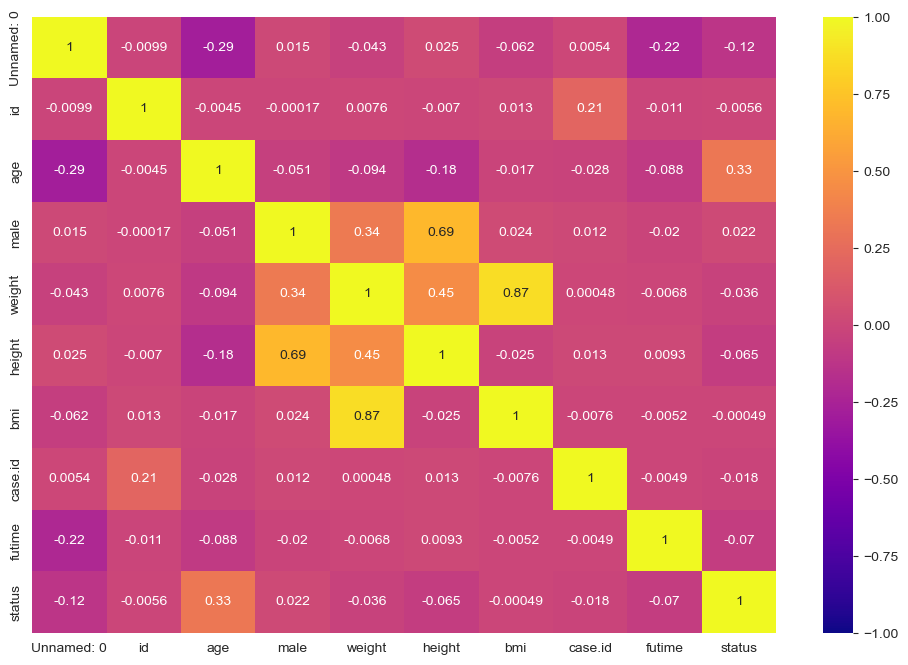

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

The heat map suggests correlation greater than 0 between four attributes `weight` and `bmi` (0.87), `height` and `male` (0.69), `weight` and `male` (0.34), between `weight` and `height` (0.45). Although, the most significant correlation is between `weight` and `bmi`. 

We can further examine the pairwise distribution between `age`, `weight`, `height` and `bmi` a **pair plot**.

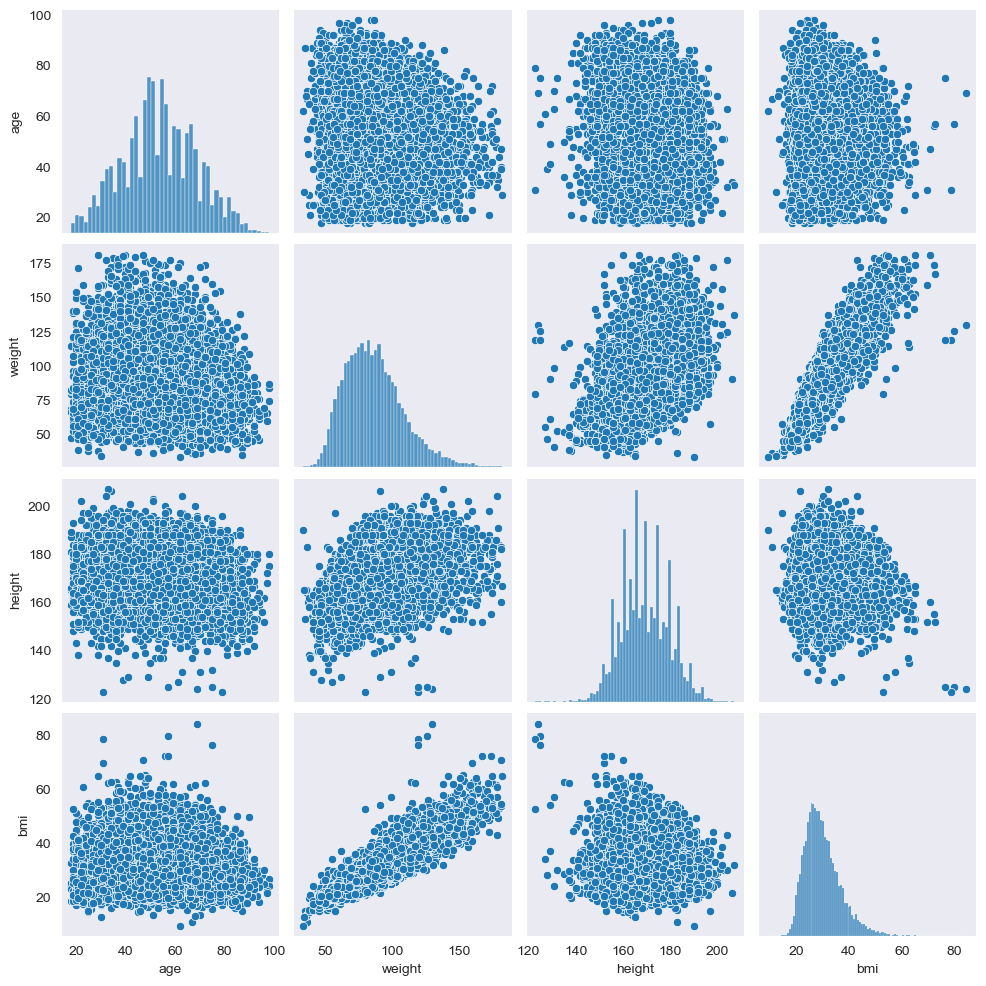

In [48]:
sns.pairplot(data=df[['age','weight','height','bmi']].dropna())
plt.show()

The numerical features mostly follow Gaussian distribution. So, the missing values can be imputed with their correspodning median values. 

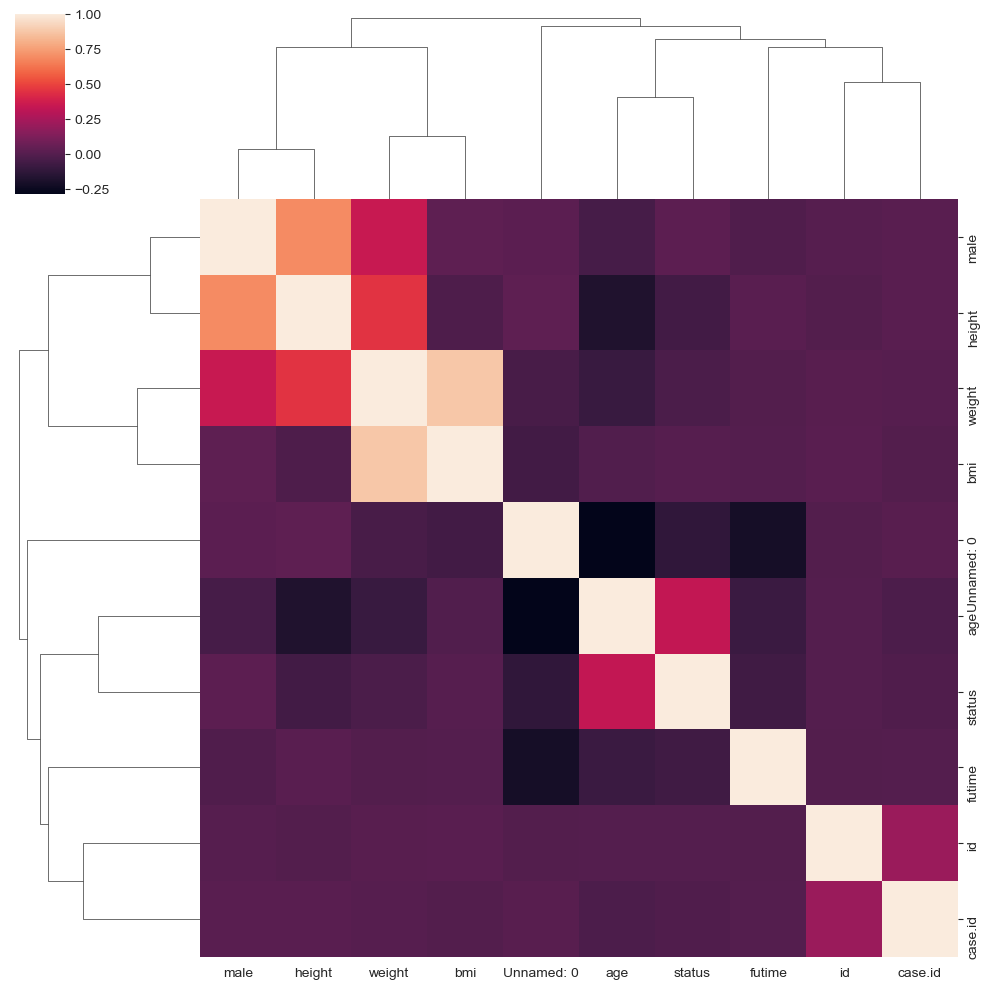

In [49]:
sns.clustermap(df.corr())